In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"dataset/temp_cleaned_v3_nooutliers.csv",parse_dates=['Datetime'])
df

,A,B,Epoch,Temperature,Datetime
0,12ebf5b0-01a8-11ec-9de6-b597d786564a,9,1615440543669,26.35,2021-03-11 13:29:03.668999936+08:00
1,12ebf5b0-01a8-11ec-9de6-b597d786564a,9,1615440544134,26.43,2021-03-11 13:29:04.134000128+08:00
2,12ebf5b0-01a8-11ec-9de6-b597d786564a,9,1615440544441,26.49,2021-03-11 13:29:04.440999936+08:00
3,12ebf5b0-01a8-11ec-9de6-b597d786564a,9,1615440545228,26.50,2021-03-11 13:29:05.228000+08:00
4,12ebf5b0-01a8-11ec-9de6-b597d786564a,9,1615440545775,26.50,2021-03-11 13:29:05.775000064+08:00
...,...,...,...,...,...
27820,dd2361c0-7a3d-11ec-a439-89feef661f3b,9,1649145700068,27.00,2022-04-05 16:01:40.068000+08:00
27821,dd2361c0-7a3d-11ec-a439-89feef661f3b,9,1649145760133,24.00,2022-04-05 16:02:40.132999936+08:00
27822,dd2361c0-7a3d-11ec-a439-89feef661f3b,9,1649146139937,29.00,2022-04-05 16:08:59.936999936+08:00
27823,dd2361c0-7a3d-11ec-a439-89feef661f3b,9,1649146339967,27.00,2022-04-05 16:12:19.967000064+08:00


In [3]:
df.index = pd.to_datetime(df['Datetime'], infer_datetime_format=True)
df[:26]

,A,B,Epoch,Temperature,Datetime
Datetime,,,,,
2021-03-11 13:29:03.668999936+08:00,12ebf5b0-01a8-11ec-9de6-b597d786564a,9,1615440543669,26.35,2021-03-11 13:29:03.668999936+08:00
2021-03-11 13:29:04.134000128+08:00,12ebf5b0-01a8-11ec-9de6-b597d786564a,9,1615440544134,26.43,2021-03-11 13:29:04.134000128+08:00
2021-03-11 13:29:04.440999936+08:00,12ebf5b0-01a8-11ec-9de6-b597d786564a,9,1615440544441,26.49,2021-03-11 13:29:04.440999936+08:00
2021-03-11 13:29:05.228000+08:00,12ebf5b0-01a8-11ec-9de6-b597d786564a,9,1615440545228,26.50,2021-03-11 13:29:05.228000+08:00
2021-03-11 13:29:05.775000064+08:00,12ebf5b0-01a8-11ec-9de6-b597d786564a,9,1615440545775,26.50,2021-03-11 13:29:05.775000064+08:00
2021-03-11 13:29:06.212999936+08:00,12ebf5b0-01a8-11ec-9de6-b597d786564a,9,1615440546213,26.60,2021-03-11 13:29:06.212999936+08:00
2021-03-11 13:29:07.196999936+08:00,12ebf5b0-01a8-11ec-9de6-b597d786564a,9,1615440547197,26.74,2021-03-11 13:29:07.196999936+08:00
2021-03-11 13:29:07.635000064+08:00,12ebf5b0-01a8-11ec-9de6-b597d786564a,9,1615440547635,26.85,2021-03-11 13:29:07.635000064+08:00
2021-03-11 13:29:07.961999872+08:00,12ebf5b0-01a8-11ec-9de6-b597d786564a,9,1615440547962,26.92,2021-03-11 13:29:07.961999872+08:00


<AxesSubplot:xlabel='Datetime'>

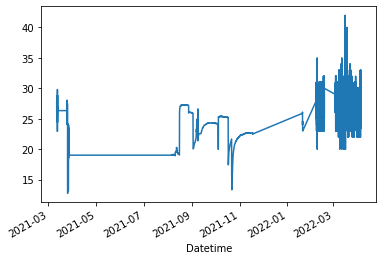

In [4]:
temp = df['Temperature']
temp.plot()                     

In [5]:
def df_to_X_y(df, window_size=5):
    df_as_np  = df.to_numpy()
    X= []
    y= []
    for i in range(len(df_as_np)- window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [6]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((27820, 5, 1), (27820,))

In [7]:
#Split the data to train and test set
X_train, y_train = X[:20000], y[:20000]
X_val, y_val = X[20000:24000], y[20000:24000]
X_test, y_test = X[24000:], y[24000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((20000, 5, 1), (20000,), (4000, 5, 1), (4000,), (3820, 5, 1), (3820,))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM((64)))
model1.add(Dense(8,'relu'))
model1.add(Dense(1,'linear'))


model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [9]:
cp = ModelCheckpoint('model1/',save_best_only=True)


model1.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [10]:
model1.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=10, callbacks=[cp])                                            

Epoch 1/10
625/625 [==============================] - 3s 3ms/step - loss: 21.2292 - root_mean_squared_error: 21.7901 - val_loss: 15.8109 - val_root_mean_squared_error: 16.0024


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 10.3172 - root_mean_squared_error: 11.2136 - val_loss: 6.4438 - val_root_mean_squared_error: 6.8909


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 3.9369 - root_mean_squared_error: 4.7682 - val_loss: 2.1180 - val_root_mean_squared_error: 2.6466


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 2.7453 - root_mean_squared_error: 3.4826 - val_loss: 1.8941 - val_root_mean_squared_error: 2.3124


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 1.4788 - root_mean_squared_error: 2.1246 - val_loss: 1.5938 - val_root_mean_squared_error: 2.0902


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.7594 - root_mean_squared_error: 1.4848 - val_loss: 1.5476 - val_root_mean_squared_error: 2.0753


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6498 - root_mean_squared_error: 1.4434 - val_loss: 1.5442 - val_root_mean_squared_error: 2.0783


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6321 - root_mean_squared_error: 1.4413 - val_loss: 1.5345 - val_root_mean_squared_error: 2.0768


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 9/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6249 - root_mean_squared_error: 1.4395 - val_loss: 1.5341 - val_root_mean_squared_error: 2.0784


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 10/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6211 - root_mean_squared_error: 1.4381 - val_loss: 1.5356 - val_root_mean_squared_error: 2.0784


In [11]:
model1.save('nooutlier_keras.h5')

In [12]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [13]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals': y_train})
train_results

,Train Predictions,Actuals
0,26.486408,26.60
1,26.529726,26.74
2,26.607470,26.85
3,26.714327,26.92
4,26.815983,27.13
...,...,...
19995,29.987711,30.00
19996,29.987711,30.00
19997,29.987711,30.00
19998,29.987713,30.00


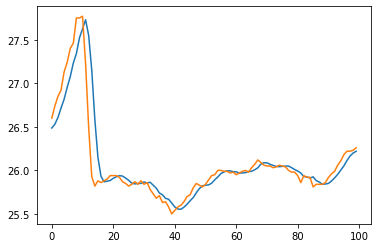

In [14]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

In [15]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data = {'Val predictions': val_predictions, 'Actuals': y_val})
val_results

,Val predictions,Actuals
0,29.987711,30.0
1,29.987711,30.0
2,29.987711,30.0
3,29.987711,30.0
4,29.987711,30.0
...,...,...
3995,22.356663,22.0
3996,22.103424,22.0
3997,22.013390,22.0
3998,22.013388,22.0


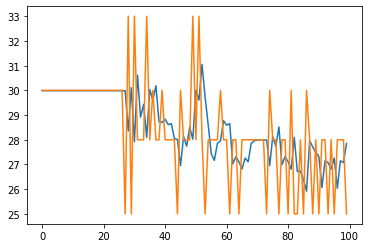

In [16]:
plt.plot(val_results['Val predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [17]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals':y_test})
test_results

,Test Predictions,Actuals
0,22.013390,22.0
1,22.013390,22.0
2,22.013390,22.0
3,22.013390,22.0
4,22.013390,22.0
...,...,...
3815,26.423182,27.0
3816,26.181017,24.0
3817,25.775389,29.0
3818,27.109718,27.0


In [18]:
test_results[:100]

,Test Predictions,Actuals
0,22.013390,22.0
1,22.013390,22.0
2,22.013390,22.0
3,22.013390,22.0
4,22.013390,22.0
...,...,...
95,25.011482,25.0
96,25.011477,25.0
97,25.011477,25.0
98,25.011477,25.0


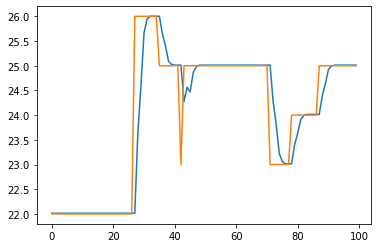

In [19]:
plt.plot(test_results['Test Predictions'][0:100])
plt.plot(test_results['Actuals'][0:100])